# Exploratory Data Analysis (EDA)
This notebook explores the solar power dataset, visualizes key features, and prepares the data for modeling.

## Exploratory Data Analysis — Solar Power Forecasting

This notebook covers:
- Loading the raw solar power dataset
- Inspecting columns and data types
- Handling missing values
- Plotting target distribution
- Plotting power generation over time
- Analyzing correlations
- Identifying seasonality and daily patterns


## 1. Import Libraries
Import necessary Python libraries for data analysis and visualization.

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Load Dataset
Read the raw solar power data into a DataFrame.

In [2]:
# Load raw solar power dataset
RAW_DATA_PATH = '../data/raw/BigML_Dataset_5f50a4cc0d052e40e6000034.csv'
df = pd.read_csv(RAW_DATA_PATH)
df.head()

,Day of Year,Year,Month,Day,First Hour of Period,Is Daylight,Distance to Solar Noon,Average Temperature (Day),Average Wind Direction (Day),Average Wind Speed (Day),Sky Cover,Visibility,Relative Humidity,Average Wind Speed (Period),Average Barometric Pressure (Period),Power Generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


## 3. Data Overview
Show basic info, shape, and first rows of the dataset.

In [27]:
# Inspect columns and data types
display(df.info())

display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Day of Year                           2920 non-null   int64  
 1   Year                                  2920 non-null   int64  
 2   Month                                 2920 non-null   int64  
 3   Day                                   2920 non-null   int64  
 4   First Hour of Period                  2920 non-null   int64  
 5   Is Daylight                           2920 non-null   bool   
 6   Distance to Solar Noon                2920 non-null   float64
 7   Average Temperature (Day)             2920 non-null   int64  
 8   Average Wind Direction (Day)          2920 non-null   int64  
 9   Average Wind Speed (Day)              2920 non-null   float64
 10  Sky Cover                             2920 non-null   int64  
 11  Visibility       

None

,count,mean,std,min,25%,50%,75%,max
Day of Year,2920.0,183.334247,105.769919,1.000000,92.000000,183.000000,275.000000,366.000000
Year,2920.0,2008.665753,0.471807,2008.000000,2008.000000,2009.000000,2009.000000,2009.000000
Month,2920.0,6.526027,3.448442,1.000000,4.000000,7.000000,10.000000,12.000000
Day,2920.0,15.720548,8.797754,1.000000,8.000000,16.000000,23.000000,31.000000
First Hour of Period,2920.0,11.500000,6.875041,1.000000,6.250000,11.500000,16.750000,22.000000
Distance to Solar Noon,2920.0,0.503294,0.298024,0.050401,0.243714,0.478957,0.739528,1.141361
Average Temperature (Day),2920.0,58.468493,6.841200,42.000000,53.000000,59.000000,63.000000,78.000000
Average Wind Direction (Day),2920.0,24.953425,6.915178,1.000000,25.000000,27.000000,29.000000,36.000000
Average Wind Speed (Day),2920.0,10.096986,4.838185,1.100000,6.600000,10.000000,13.100000,26.600000
Sky Cover,2920.0,1.987671,1.411978,0.000000,1.000000,2.000000,3.000000,4.000000


## 4. Data Cleaning
Rename columns, handle missing values, and sort data.

In [53]:
# Rename columns (snake_case)

df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# remove parentesis () from column names
df.columns = [col.replace('(', '').replace(')', '') for col in df.columns]
df.head()


,day_of_year,year,month,day,first_hour_of_period,is_daylight,distance_to_solar_noon,average_temperature_day,average_wind_direction_day,average_wind_speed_day,sky_cover,visibility,relative_humidity,average_wind_speed_period,average_barometric_pressure_period,power_generated
0,245,2008,9,1,1,False,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,245,2008,9,1,4,False,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,245,2008,9,1,7,True,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,245,2008,9,1,10,True,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,245,2008,9,1,13,True,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


In [54]:
# Handle missing values
missing = df.isnull().sum()
print('Missing values per column:')
print(missing)
# Example: df = df.dropna()  # Uncomment if dropping is appropriate

Missing values per column:
day_of_year                           0
year                                  0
month                                 0
day                                   0
first_hour_of_period                  0
is_daylight                           0
distance_to_solar_noon                0
average_temperature_day               0
average_wind_direction_day            0
average_wind_speed_day                0
sky_cover                             0
visibility                            0
relative_humidity                     0
average_wind_speed_period             1
average_barometric_pressure_period    0
power_generated                       0
dtype: int64


## 5. Correlation Analysis

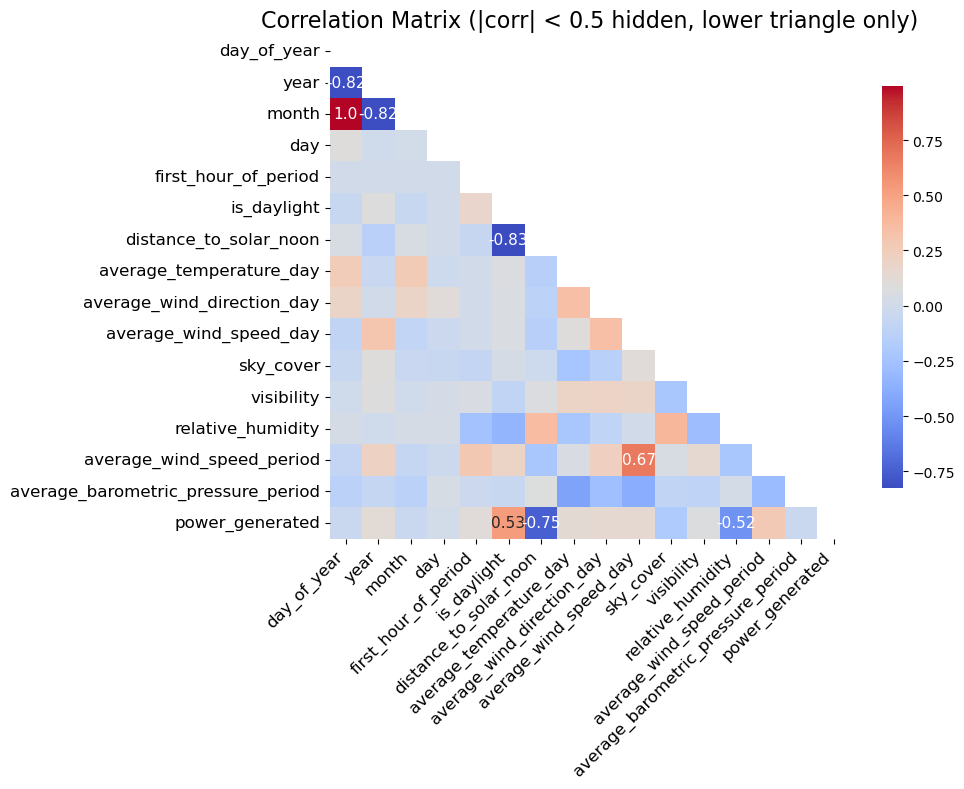

In [ ]:
# Analyze correlations
corr = df.corr(numeric_only=True)
mask = corr.abs() < 0.5
# Create annotation matrix: show value only if abs(corr) >= 0.5
annot = corr.round(2).astype(str)
annot = annot.mask(mask, '')
plt.figure(figsize=(10, 8))
# Show only the lower triangle of the heatmap
mask_triangle = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=annot, cmap='coolwarm', fmt='', annot_kws={"size": 11}, cbar_kws={"shrink": 0.8}, mask=mask_triangle)
plt.title('Correlation Matrix (|corr| < 0.5 hidden, lower triangle only)', fontsize=16)
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
corr = df.corr() 
corr.style.background_gradient(cmap='coolwarm')

,day_of_year,year,month,day,first_hour_of_period,is_daylight,distance_to_solar_noon,average_temperature_day,average_wind_direction_day,average_wind_speed_day,sky_cover,visibility,relative_humidity,average_wind_speed_period,average_barometric_pressure_period,power_generated
day_of_year,1.000000,-0.818537,0.996520,0.094796,-0.000000,-0.054880,0.044277,0.257592,0.190998,-0.088958,-0.052647,-0.006173,0.032213,-0.073227,-0.122333,-0.037377
year,-0.818537,1.000000,-0.818367,-0.002703,-0.000000,0.087139,-0.135518,-0.046568,0.006147,0.304638,0.092548,0.090939,-0.004124,0.214389,-0.069928,0.123082
month,0.996520,-0.818367,1.000000,0.011893,-0.000000,-0.054889,0.042974,0.262902,0.185719,-0.082071,-0.048411,-0.006686,0.029341,-0.068733,-0.128163,-0.036585
day,0.094796,-0.002703,0.011893,1.000000,0.000000,0.004921,-0.000602,-0.022095,0.110605,-0.035987,-0.050966,0.025587,0.032486,-0.023474,0.038486,0.006718
first_hour_of_period,-0.000000,-0.000000,-0.000000,0.000000,1.000000,0.173048,-0.062159,-0.000000,0.000000,0.000000,-0.073582,0.050662,-0.251801,0.289482,-0.033697,0.107341
is_daylight,-0.054880,0.087139,-0.054889,0.004921,0.173048,1.000000,-0.827072,0.067230,0.056284,0.059940,0.028587,-0.087069,-0.340942,0.192290,-0.053754,0.532062
distance_to_solar_noon,0.044277,-0.135518,0.042974,-0.000602,-0.062159,-0.827072,1.000000,-0.145207,-0.118010,-0.145073,-0.015184,0.065807,0.368964,-0.214891,0.082505,-0.746681
average_temperature_day,0.257592,-0.046568,0.262902,-0.022095,-0.000000,0.067230,-0.145207,1.000000,0.342146,0.096267,-0.230672,0.194110,-0.221463,0.054546,-0.435723,0.132193
average_wind_direction_day,0.190998,0.006147,0.185719,0.110605,0.000000,0.056284,-0.118010,0.342146,1.000000,0.341529,-0.137140,0.203445,-0.095917,0.229844,-0.272405,0.146788
average_wind_speed_day,-0.088958,0.304638,-0.082071,-0.035987,0.000000,0.059940,-0.145073,0.096267,0.341529,1.000000,0.107793,0.184778,0.004901,0.673626,-0.379752,0.142641


## 6. Visualizations

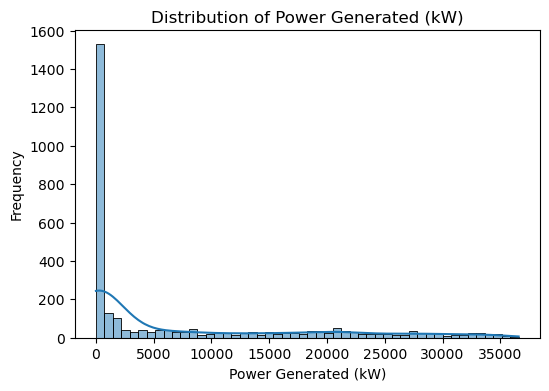

In [55]:
# Plot target distribution
plt.figure(figsize=(6,4))
sns.histplot(df['power_generated'], bins=50, kde=True)
plt.title('Distribution of Power Generated (kW)')
plt.xlabel('Power Generated (kW)')
plt.ylabel('Frequency')
plt.show()

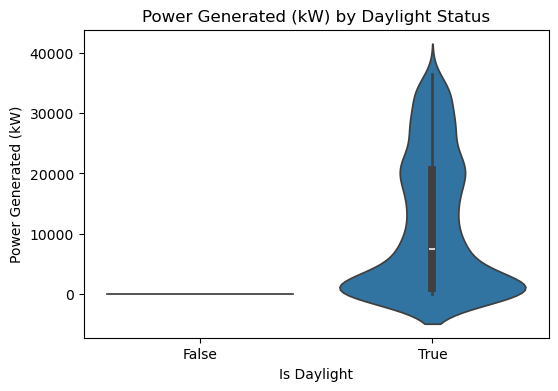

In [ ]:
# Violinplot comparing `power_generated_kw` for daylight vs non-daylight periods.
plt.figure(figsize=(6,4))
sns.violinplot(x='is_daylight', y='power_generated', data=df)
plt.title('Power Generated (kW) by Daylight Status')
plt.xlabel('Is Daylight')
plt.ylabel('Power Generated (kW)')
plt.show()

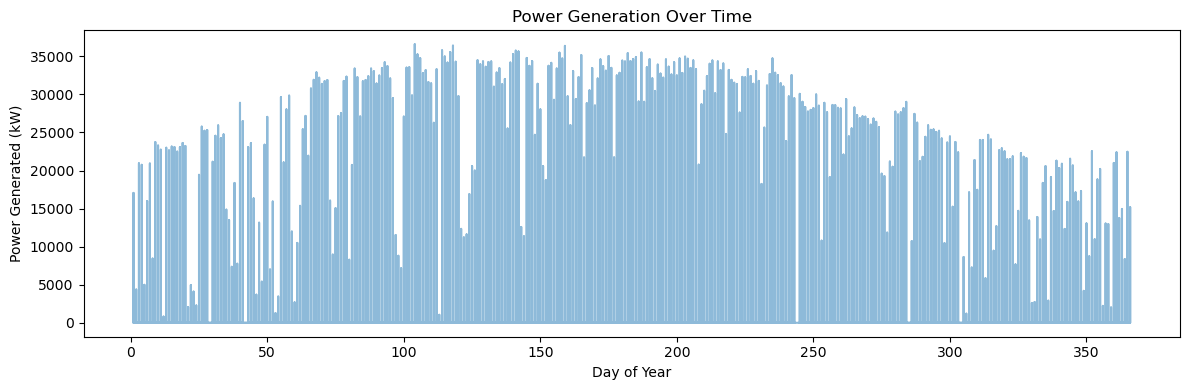

In [ ]:
# Plot power generation over time
plt.figure(figsize=(12,4))
plt.plot(df['day_of_year'], df['power_generated'], alpha=0.5)
plt.title('Power Generation Over Time')
plt.xlabel('Day of Year')
plt.ylabel('Power Generated (kW)')
plt.tight_layout()
plt.show()


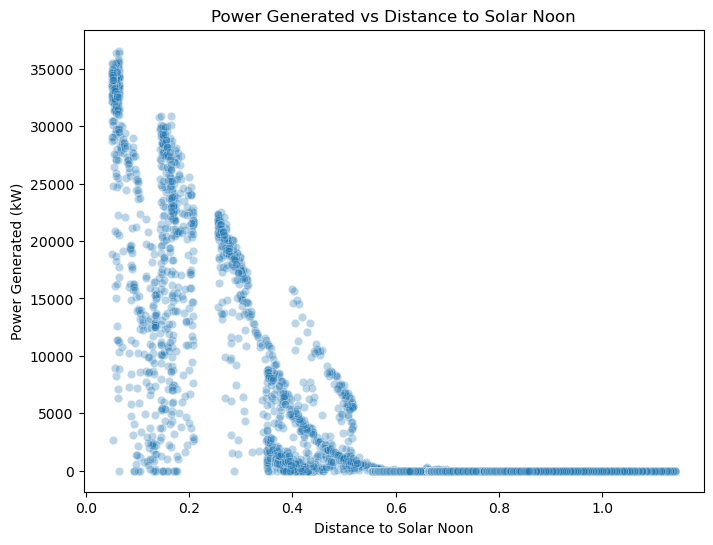

In [61]:
# scatter plot of `Power Generated` versus `Distance to Solar Noon`
plt.figure(figsize=(8,6))
sns.scatterplot(x='distance_to_solar_noon', y='power_generated', data=df, alpha=0.3)
plt.title('Power Generated vs Distance to Solar Noon')
plt.xlabel('Distance to Solar Noon')
plt.ylabel('Power Generated (kW)')
plt.show()


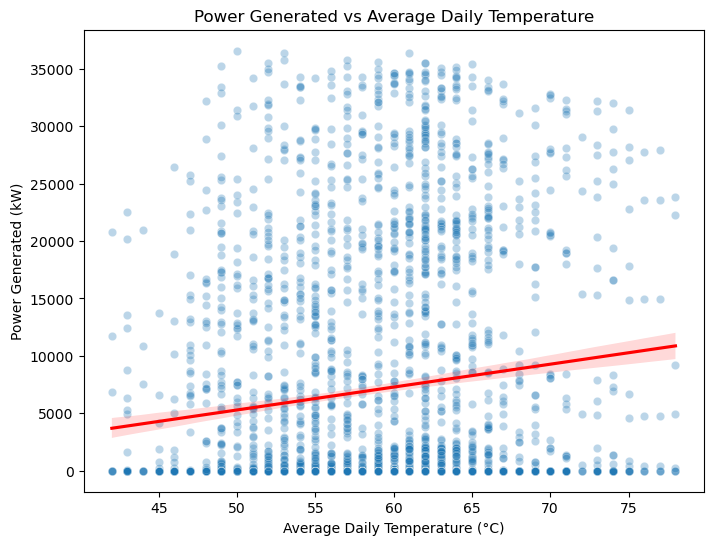

In [50]:
# Create a scatter plot of `Power Generated` versus `Average Temperature (Day)` and overlay a smooth trend line to analyze their relationship.
plt.figure(figsize=(8,6))
sns.scatterplot(x='Average Temperature (Day)', y='Power Generated', data=df, alpha=0.3)
# Use regplot without lowess to avoid statsmodels dependency
sns.regplot(x='Average Temperature (Day)', y='Power Generated', data=df, scatter=False, color='red')
plt.title('Power Generated vs Average Daily Temperature')
plt.xlabel('Average Daily Temperature (°C)')
plt.ylabel('Power Generated (kW)')
plt.show()
